<a href="https://colab.research.google.com/github/pks98/NLP_Reviews/blob/main/model_building_without_rating_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('reviews.csv',usecols=['Review_Title','Reviews','Rating'])
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0
2,Good,1. Quite good look2. Better noise cancellation...,4.0
3,not great,its a good set of ear buds but1. the quality o...,1.0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0


In [3]:
def data_clean(text):
  if text=='The media could not be loaded.':
    return " "
  else:
    return text

In [4]:
df['Reviews']=df['Reviews'].apply(data_clean)

In [5]:
df.fillna('',inplace=True)

In [6]:
df['text']=df['Review_Title']+' '+df['Reviews']

In [7]:
df.sample(5)

,Review_Title,Reviews,Rating,text
1166,Good,Nice tws at this price.ProsGood battery backup...,4.0,Good Nice tws at this price.ProsGood battery b...
3053,Not recommended for all type of usage,It's just only for listening to music. Not sup...,2.0,Not recommended for all type of usage It's jus...
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,Best buds in the budget with Type C I have bee...
3457,After 4-5 months it was not charge and now it ...,Sound quality and noise quality is superb but ...,1.0,After 4-5 months it was not charge and now it ...
1948,Mixed reaction 50-50.,It comes out often from ear. Not recommended ...,4.0,Mixed reaction 50-50. It comes out often from ...


In [11]:
df=df[df['Rating']!=3.0]

In [12]:
df.head()

,Review_Title,Reviews,Rating,text
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,AWESOME...IN LOVE WITH IT ! Really impressed w...
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,Enjoy while it lasts This is the second time I...
2,Good,1. Quite good look2. Better noise cancellation...,4.0,Good 1. Quite good look2. Better noise cancell...
3,not great,its a good set of ear buds but1. the quality o...,1.0,not great its a good set of ear buds but1. the...
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,Best buds in the budget with Type C I have bee...


In [13]:
def rating_classify(rating):
  if rating>=4:
    return 1
  else:
    return 0

In [14]:
df['label']=df['Rating'].apply(rating_classify)

In [15]:
df.sample(5)

,Review_Title,Reviews,Rating,text,label
1203,Got warranty or replacement,I am very happy❤ wth ths airdopes 😇I have giv...,4.0,Got warranty or replacement I am very happy❤ ...,1
2061,Headphones not charging,The AirPods have barely been used sparingly fo...,1.0,Headphones not charging The AirPods have barel...,0
1077,Poor support and product fails within 20 days,Product stops working as expected on one ear b...,2.0,Poor support and product fails within 20 days ...,0
2438,Superb little monster...,"Awesome product... with best sound, bass perfo...",5.0,Superb little monster... Awesome product... wi...,1
2701,Flop indian product,After 2 days right side of ear bud is stoped w...,1.0,Flop indian product After 2 days right side of...,0


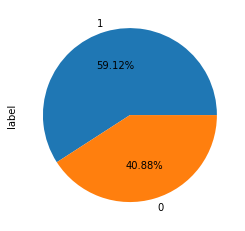

In [21]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [24]:
df['text']=df['text'].apply(text_processing)

In [25]:
df.head()

,Review_Title,Reviews,Rating,text,label
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,awesom love realli impress fastest deliveri am...,1
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,enjoy last second time write review sure earli...,0
2,Good,1. Quite good look2. Better noise cancellation...,4.0,good quit good look better nois cancel good ba...,1
3,not great,its a good set of ear buds but1. the quality o...,1.0,great good set ear bud qualiti sound get bad c...,0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,best bud budget type c research get nice tw bu...,1


In [26]:
df.drop(['Review_Title','Reviews'],axis=1,inplace=True)

In [27]:
df.head()

,Rating,text,label
0,5.0,awesom love realli impress fastest deliveri am...,1
1,2.0,enjoy last second time write review sure earli...,0
2,4.0,good quit good look better nois cancel good ba...,1
3,1.0,great good set ear bud qualiti sound get bad c...,0
4,5.0,best bud budget type c research get nice tw bu...,1


In [28]:
df.drop('Rating',axis=1,inplace=True)

In [29]:
df.sample(5)

,text,label
1507,buy want take call ur phone use poor nois canc...,0
260,valu money product amaz feel thing note buy pr...,1
2418,charg problem come sound qualiti good stop cha...,0
1177,manufactur defect eardop first let talk packag...,0
1013,amaz eardop first fall bad deliveri amazonnow ...,1


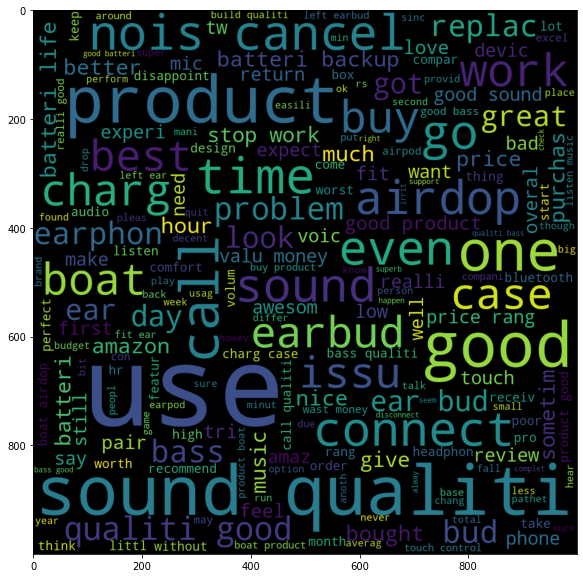

In [30]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

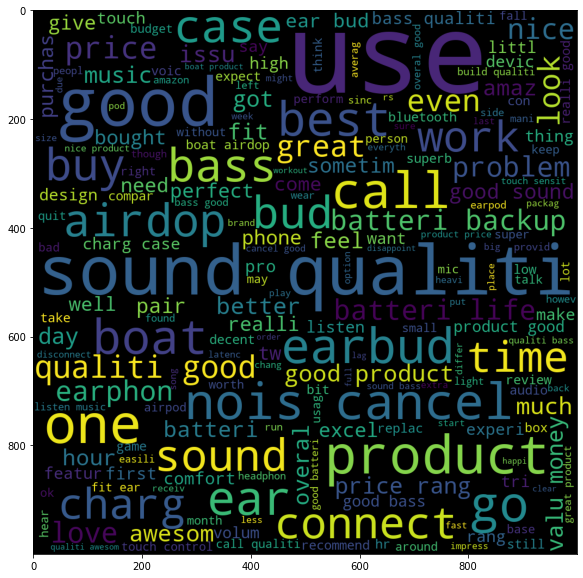

In [31]:
wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==1]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

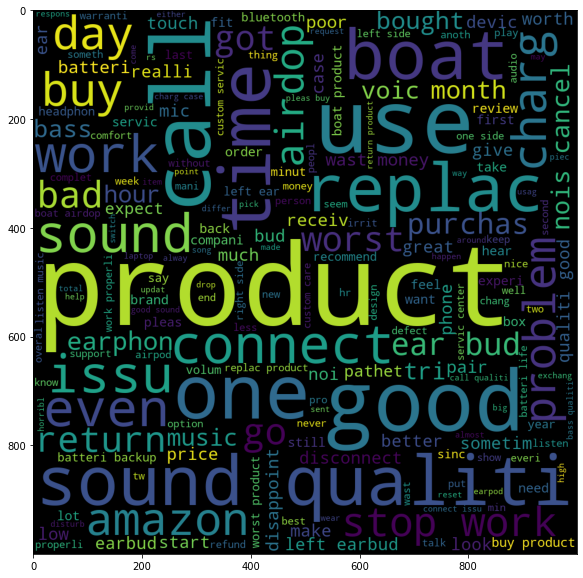

In [32]:
wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==0]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

In [33]:
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['text']).toarray()
y=df['label'].values

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [44]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier( random_state=2)
abc = AdaBoostClassifier(random_state=2)
bc = BaggingClassifier(random_state=2)
etc = ExtraTreesClassifier(random_state=2)
gbdt = GradientBoostingClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    return accuracy


In [47]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    

In [48]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
0,SVC,0.840580
4,LR,0.838969
10,xgb,0.834138
8,ETC,0.830918
5,RF,0.829308
7,BgC,0.827697
9,GBDT,0.822866
2,NB,0.821256
1,KN,0.795491
6,AdaBoost,0.792271
